In [15]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [17]:
from typing import Annotated,TypedDict,Sequence,Literal
from langgraph.graph.message import add_messages
import operator
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langchain_core.messages import AnyMessage
from langgraph.graph import StateGraph,START,END,MessagesState
from langchain_groq import ChatGroq
from IPython.display import display,Image
from langchain_core.pydantic_v1 import BaseModel,Field

In [18]:
llm=ChatGroq(model="gemma2-9b-it")

In [19]:
llm.invoke("what is gen ai")

AIMessage(content="Gen AI stands for **Generative Artificial Intelligence**.  \n\nIt's a type of AI that focuses on creating new content rather than just analyzing existing data. Think of it like this:\n\n* **Traditional AI:**  Analyzes your data to find patterns and make predictions (e.g., recommending a movie you might like).\n\n* **Gen AI:**  Uses learned patterns to generate new content based on your input (e.g., writing a poem in a specific style, composing a piece of music, or even creating an image from a text description).\n\n**Here's a breakdown of key features:**\n\n* **Learning from Data:** Gen AI models are trained on massive datasets of text, code, images, audio, etc. This allows them to understand the underlying structures and patterns within the data.\n* **Generating New Output:** Based on the learned patterns, Gen AI can create new content that resembles the training data but is not a direct copy.\n* **Variety of Applications:** Gen AI has a wide range of applications, 

In [20]:
class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]


In [ ]:
system=[SystemMessage(content="create a suitable title for the blog creation from the given question and return only the title ")]

def create_title(state:MessagesState):
    return {"messages":[llm.invoke(system + state["messages"])]}

In [ ]:
system1=[SystemMessage(content="As you are a content writter take the title from the given question and create blog")]

def blog_creation(state:MessagesState):
    question=state["messages"]
    #print(question)
    return {"messages":[llm.invoke(system1 + question)]}

In [58]:
graph=StateGraph(MessagesState)

In [59]:
graph.add_node("title_creation",create_title)
graph.add_node("blog_creation",blog_creation)
graph.add_edge("title_creation","blog_creation")
graph.set_entry_point("title_creation")
graph.set_finish_point("blog_creation")

In [60]:
app=graph.compile()

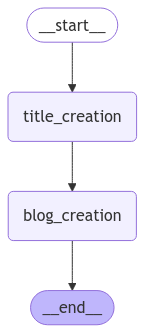

In [61]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [62]:
messages=[HumanMessage(content="what is deep learning")]

In [63]:
messages=app.invoke({"messages":messages})

[HumanMessage(content='what is deep learning', additional_kwargs={}, response_metadata={}, id='b0cee132-fc3a-41ef-b83e-be6ff798dac7'), AIMessage(content='Demystifying Deep Learning \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 30, 'total_tokens': 39, 'completion_time': 0.016363636, 'prompt_time': 0.00014807, 'queue_time': 0.022285197, 'total_time': 0.016511706}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-2d978d1c-2508-44ea-91f8-1acaecb070d5-0', usage_metadata={'input_tokens': 30, 'output_tokens': 9, 'total_tokens': 39})]


In [64]:
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is deep learning
================================== Ai Message ==================================

Demystifying Deep Learning
================================== Ai Message ==================================

 
Deep learning, a subset of machine learning, is rapidly transforming our world.  From self-driving cars to personalized medicine, its applications are vast and ever-expanding. But what exactly is deep learning, and how does it work?  

**Unveiling the Layers:**

Imagine a brain with numerous interconnected neurons. Deep learning algorithms mimic this structure, using artificial neural networks with multiple layers. These layers progressively extract higher-level features from the input data. For instance, in image recognition, the first layers might detect edges and shapes, while subsequent layers identify patterns, objects, and even emotions.

**The Power of Data:**

Deep learning thrives on d